In [49]:
import pandas as pd 
df = pd.read_csv('D:\ML\wine quality\winequality-red.csv', delimiter = ';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [50]:
quality_map = { 3:0,
                4:1,
                5:2,
                6:3,
                7:4, 
                8:5}

df.loc[:, 'quality'] = df.quality.map(quality_map)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [51]:
df = df.sample(frac= 1).reset_index(drop = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.8,0.240,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,2
1,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,3
2,8.8,0.700,0.00,1.7,0.069,8.0,19.0,0.99701,3.31,0.53,10.0,3
3,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,3
4,6.6,0.700,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.0,0.710,0.00,2.6,0.080,11.0,34.0,0.99760,3.44,0.53,9.5,2
1595,8.0,0.620,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,3
1596,7.2,0.380,0.38,2.8,0.068,23.0,42.0,0.99356,3.34,0.72,12.9,4
1597,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6,2


In [52]:
df_train = df.head(1000)
df_test = df.tail(599)
df_train_X= df_train.iloc[:, 0:11]
df_train_y = df_train.iloc[:, -1 ]
df_test_X= df_test.iloc[:, 0:11]
df_test_y= df_test.iloc[:, -1] 

print(df_train.shape)
print(df_test.shape)

df_test_y.shape

(1000, 12)
(599, 12)


(599,)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train_X = sc.fit_transform(df_train_X)
df_test_X = sc.fit_transform(df_test_X)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

clf = DecisionTreeClassifier(max_depth = 15) 
clf_train= clf.fit(df_train_X, df_train_y)

In [47]:
import numpy as np
test_pred = clf.predict(df_test_X)

test_accuracy = metrics.accuracy_score(df_test.iloc[:,-1],test_pred)
test_accuracy

0.5258764607679466

In [48]:
test_pred.shape

(599,)

In [9]:
a= [6.8,0.688,0.19,2.8,0.058,15,42,0.99852,3.26,0.89,4.1]
print(clf.predict(sc.transform([a])))

[2]


In [10]:
train_pred = clf.predict(df_train_X)

train_accuracy = metrics.accuracy_score(df_train.iloc[:,-1],train_pred)
train_accuracy

0.635

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [34]:
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

In [35]:
%matplotlib inline
 
train_accuracies = [0.5]
test_accuracies = [0.5]

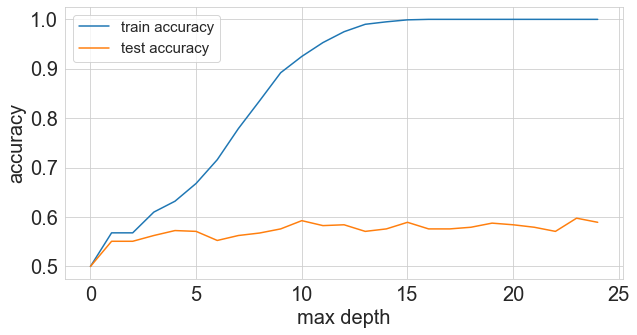

In [36]:
for depth in range(1,25): 
    clf = DecisionTreeClassifier(max_depth = depth)
    
    clf.fit(df_train_X,df_train_y)
    
    train_pred = clf.predict(df_train_X)
    test_pred= clf.predict(df_test_X)
    
    train_accuracy = metrics.accuracy_score(df_train_y,train_pred)
    test_accuracy = metrics.accuracy_score(df_test_y,test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize= (10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label = "train accuracy")
plt.plot(test_accuracies, label ="test accuracy")
plt.legend(loc = "upper left", prop ={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel("max depth", size = 20)
plt.ylabel("accuracy", size = 20)
plt.show()

Text(0, 0.5, 'count')

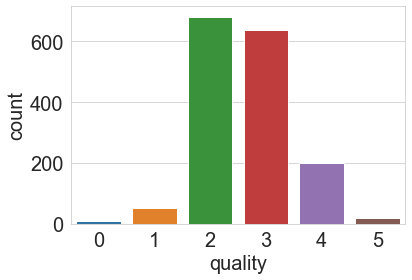

In [38]:
b = sns.countplot(x = 'quality', data = df)
b.set_xlabel("quality", fontsize = 20)
b.set_ylabel("count", fontsize = 20)